In [1]:
import ast
import numpy as np
import torch
import matplotlib.pyplot as plt

from constants import DEVICE, NUM_SAMPLE, FREQ_SAMPLE, FREQS_MHZ
from modules.data_utils import H5LazyDataset

In [2]:
h5_lazy_dataset = H5LazyDataset(
    'data/train/train.h5', 'waveforms', 'labels',
    data_transforms=(
        lambda data: torch.tensor(data, dtype=torch.complex64),
        torch.fft.fft,
        torch.abs,
        lambda data: data.to(dtype=torch.float64),
        lambda data: (data - data.min()) / (data.max() - data.min()),
        torch.fft.fftshift,
    ),
    label_transforms=(
        lambda _bytes: _bytes.decode('utf-8'),
        ast.literal_eval,
        lambda label: torch.tensor(label, dtype=torch.float64),
    ),
)

In [3]:
waveform: torch.Tensor
label: torch.Tensor
waveform, label = h5_lazy_dataset[9999]

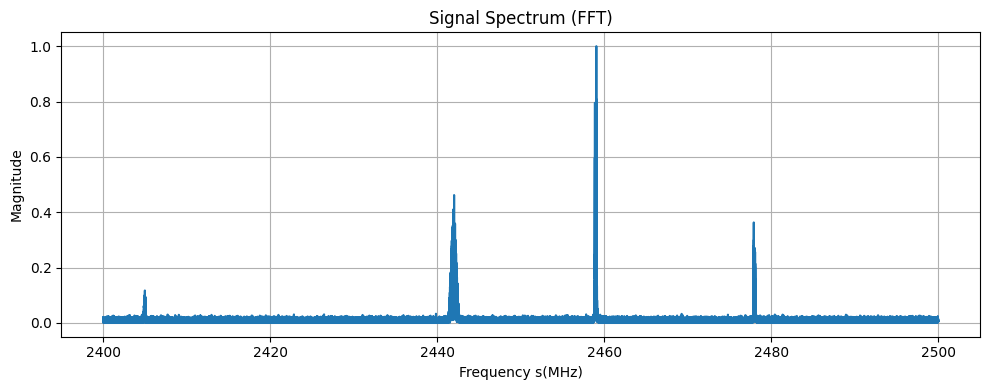

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(FREQS_MHZ, waveform)
plt.title("Signal Spectrum (FFT)")
plt.xlabel("Frequency s(MHz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
print(label)
print(FREQS_MHZ[0:4])

tensor([[2477.8750, 2478.1250],
        [2441.5000, 2442.5000],
        [2404.8750, 2405.1250],
        [2458.8750, 2459.1250]], dtype=torch.float64)
tensor([2400.0000, 2400.0010, 2400.0020, 2400.0030], dtype=torch.float64)


In [6]:
print(waveform.dtype)

torch.float64
